In [1]:
## 1. Data Encoding

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('new_carpred.csv')
df.head()

,Unnamed: 0,Brand,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car_Age
0,0,Tesla,2.3,Petrol,Manual,114832,New,26613.92,Model X,9
1,1,BMW,4.4,Electric,Manual,143190,Used,14679.61,5 Series,7
2,2,Audi,4.5,Electric,Manual,181601,New,44402.61,A4,12
3,3,Tesla,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,14
4,4,Ford,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,16


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2500 non-null   int64  
 1   Brand         2500 non-null   str    
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   str    
 4   Transmission  2500 non-null   str    
 5   Mileage       2500 non-null   int64  
 6   Condition     2500 non-null   str    
 7   Price         2500 non-null   float64
 8   Model         2500 non-null   str    
 9   Car_Age       2500 non-null   int64  
dtypes: float64(2), int64(3), str(5)
memory usage: 195.4 KB


In [5]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

print("Encoded shape:", df_encoded.shape)
display(df_encoded.head())

Encoded shape: (2500, 49)


C:\Users\SHILPA CHOWNI\AppData\Local\Temp\ipykernel_19372\2843233332.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()


,Unnamed: 0,Engine Size,Mileage,Price,Car_Age,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,0,2.3,114832,26613.92,9,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,4.4,143190,14679.61,7,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,4.5,181601,44402.61,12,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,4.1,68682,86374.33,14,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,4,2.6,223009,73577.10,16,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


In [6]:
# Separate features (X) and target (y)
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (2500, 48)
Target shape: (2500,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    return {
        "Model ":name,
        "MAE ":mae,
        "RMSE ":rmse,
        "R2 ":r2
    }

In [11]:
LRModel= evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test)
print(LRModel)

{'Model ': 'Linear Regression', 'MAE ': 24061.70231099982, 'RMSE ': np.float64(27845.738366321402), 'R2 ': -0.02400121357589602}


In [12]:
DTModel = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test)
print(DTModel)

{'Model ': 'Decision Tree', 'MAE ': 32023.470120000005, 'RMSE ': np.float64(38737.54095557089), 'R2 ': -0.9817418993080944}


In [13]:
RFModel = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test)
print(RFModel)

{'Model ': 'Random Forest', 'MAE ': 24119.945083200004, 'RMSE ': np.float64(28041.744065852934), 'R2 ': -0.038467805843085845}


In [14]:
LaModel = evaluate_model("Lasso Regression", Lasso(alpha=0.001, random_state=42), X_train, X_test, y_train, y_test)
print(LaModel)

{'Model ': 'Lasso Regression', 'MAE ': 24061.701289459517, 'RMSE ': np.float64(27845.736474659403), 'R2 ': -0.02400107444766797}


c:\Users\SHILPA CHOWNI\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.012e+11, tolerance: 1.294e+08
  model = cd_fast.enet_coordinate_descent(


In [15]:
results = []
results.append(LRModel)
results.append(DTModel)
results.append(RFModel)
results.append(LaModel)
results = pd.DataFrame(results)
display(results)

,Model,MAE,RMSE,R2
0,Linear Regression,24061.702311,27845.738366,-0.024001
1,Decision Tree,32023.470120,38737.540956,-0.981742
2,Random Forest,24119.945083,28041.744066,-0.038468
3,Lasso Regression,24061.701289,27845.736475,-0.024001


In [16]:
print(results.columns)

Index(['Model ', 'MAE ', 'RMSE ', 'R2 '], dtype='str')


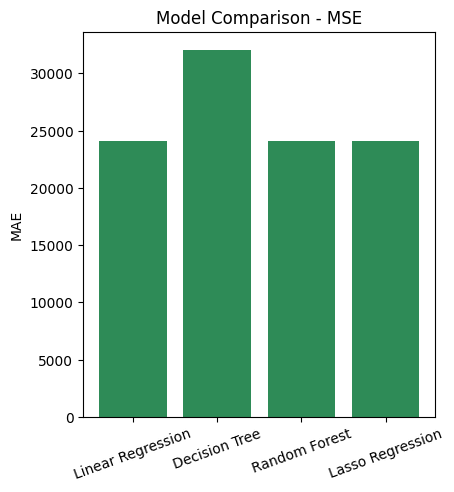

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plt.bar(results["Model "], results["MAE "], color='seagreen')
plt.title("Model Comparison - MSE")
plt.ylabel('MAE')
plt.xticks(rotation=20)
plt.show()

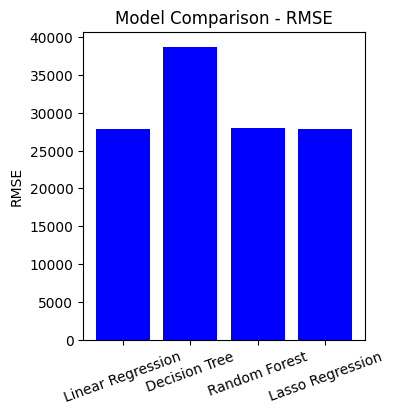

In [18]:
plt.figure(figsize= (8,4))
plt.subplot(1,2,1)
plt.bar(results["Model "], results["RMSE "], color='blue')
plt.title("Model Comparison - RMSE")
plt.ylabel('RMSE')
plt.xticks(rotation=20)
plt.show()

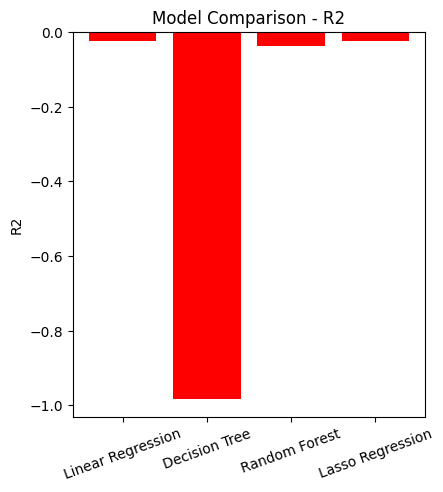

In [19]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plt.bar(results["Model "], results["R2 "], color='red')
plt.title("Model Comparison - R2")
plt.ylabel('R2')
plt.xticks(rotation=20)
plt.show()

In [23]:
# HyperTuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [24]:
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 20],
    "min_samples_split": [2, 5]
}
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

In [25]:
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
print("✅ Best Random Forest Params:", grid_rf.best_params_)

✅ Best Random Forest Params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [26]:
y_pred_rf = best_rf.predict(X_test)
print("RMSE (RF):", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R² (RF):", r2_score(y_test, y_pred_rf))

RMSE (RF): 27971.27759607178
R² (RF): -0.03325520450414832


In [27]:
# XGBoost Tuning

In [28]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42, verbosity=0)
param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_
print("\nBest XGBoost Params:", grid_xgb.best_params_)


Best XGBoost Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
y_pred_xgb = best_xgb.predict(X_test)
print("RMSE (XGB):", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R² (XGB):", r2_score(y_test, y_pred_xgb))

RMSE (XGB): 27597.784350789458
R² (XGB): -0.005845849725412577


In [ ]:
# LightGBM Tuning

In [ ]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state=42)
param_grid_lgbm = {
    "n_estimators": [100, 200, 300],
    "max_depth": [-1, 10, 20],
    "learning_rate": [0.01, 0.1, 0.2]
}
grid_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=5,
    n_jobs=-1,
    scoring="neg_mean_squared_error"
)

In [ ]:
# Ensure y_train and y_test are 1D arrays
y_train = y_train.ravel()
y_test = y_test.ravel()
X_train.columns = X_train.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")

C:\Users\SHILPA CHOWNI\AppData\Local\Temp\ipykernel_17140\3982799668.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()
C:\Users\SHILPA CHOWNI\AppData\Local\Temp\ipykernel_17140\3982799668.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


In [ ]:
grid_lgbm.fit(X_train, y_train)
best_lgbm = grid_lgbm.best_estimator_
# Predict with fixed y_test
y_pred_lgbm = best_lgbm.predict(X_test)
print("Best LightGBM Params:", grid_lgbm.best_params_)
print("RMSE (LGBM):", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("R² (LGBM):", r2_score(y_test, y_pred_lgbm))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 1750, number of used features: 43
[LightGBM] [Info] Start training from score 52509.406593
Best LightGBM Params: {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 100}
RMSE (LGBM): 27859.072509146365
R² (LGBM): -0.024982149865571124


In [ ]:
final_results = []
# Evaluate tuned Random Forest
final_results.append({
    "Model": "Random Forest (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "R²": r2_score(y_test, y_pred_rf)
})
# Evaluate tuned XGBoost
final_results.append({
    "Model": "XGBoost (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    "R²": r2_score(y_test, y_pred_xgb)
})
# Evaluate tuned LightGBM
final_results.append({
    "Model": "LightGBM (Tuned)",
    "MAE": mean_absolute_error(y_test, y_pred_lgbm),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lgbm)),
    "R²": r2_score(y_test, y_pred_lgbm)
})

In [ ]:
final_results = pd.concat([results, pd.DataFrame(final_results)], ignore_index=True)
print("✅ Final Comparison (All Models)")
display(final_results)

✅ Final Comparison (All Models)


,Model,MAE,RMSE,R2,Model,MAE,RMSE,R²
0,Linear Regression,24051.706537,27828.568985,-0.022739,NaN,NaN,NaN,NaN
1,Decision Tree,31070.146587,38043.839135,-0.911400,NaN,NaN,NaN,NaN
2,Random Forest,24508.056013,28379.888392,-0.063664,NaN,NaN,NaN,NaN
3,Lasso Regression,24051.706080,27828.565872,-0.022739,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Random Forest (Tuned),24137.712346,27873.347456,-0.026033
5,NaN,NaN,NaN,NaN,XGBoost (Tuned),23938.470584,27597.784351,-0.005846
6,NaN,NaN,NaN,NaN,LightGBM (Tuned),24138.633932,27859.072509,-0.024982


In [ ]:
best_model = final_results.loc[final_results['R²'].idxmax(), 'Model']
print("✅ Best model selected:", best_model)

# Map the model names to objects
model_mapping = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": best_rf,         # tuned version
    "XGBoost (Tuned)": best_xgb,
    "LightGBM (Tuned)": best_lgbm,
    "Lasso Regression": Lasso(alpha=0.001, random_state=42)
}

✅ Best model selected: XGBoost (Tuned)


In [ ]:
final_best_model = model_mapping.get(best_model, best_rf)

In [ ]:
import joblib
X_train.columns = X_train.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")
joblib.dump(final_best_model, "best_car_price_model.pkl")
print("💾 Model saved as best_car_price_model.pkl")

💾 Model saved as best_car_price_model.pkl


In [ ]:
# Save training feature columns (order matters for prediction)
joblib.dump(X_train.columns, "model_columns.pkl")
print("✅ Model and columns saved successfully!")

✅ Model and columns saved successfully!
